In [16]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed


# Loading in the strings for the data files 0:hw=10, 1:hw=12, 2:hw=14, 3:hw=16, 4:hw=18, 5:hw=20
vNN_dat_chi2bM3A = [r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO010.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO010.meho", r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO012.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO012.meho",r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO014.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO014.meho", r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO016.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO016.meho", r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO018.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO018.meho", r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO020.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO020.meho"]
vNN_dat_chi2bSMSI5C = [r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO010.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO010.meho", r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO012.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO012.meho", r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO014.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO014.meho", r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO016.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO016.meho", r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO018.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO018.meho", r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO020.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO020.meho"]
tRel_dat = [r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO010.meho\trel_NMax100_LMax02_hwHO010.meho", r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO012.meho\trel_NMax100_LMax02_hwHO012.meho", r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO014.meho\trel_NMax100_LMax02_hwHO014.meho", r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO016.meho\trel_NMax100_LMax02_hwHO016.meho", r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO018.meho\trel_NMax100_LMax02_hwHO018.meho", r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO020.meho\trel_NMax100_LMax02_hwHO020.meho"]

In this notebook we are going to discuss how to solve for the groundstate energy of the Deuteron, the simplest many body quantum problem in nuclear structure physics. 

We are going to do so in two different basises: The Harmonic Oscillator and the momentum basis. We will then compare these two approaches. 

Let us start with the Harmonic Oscillator. We create a function which returns the eigenvalues we look for when entering the data. 

 

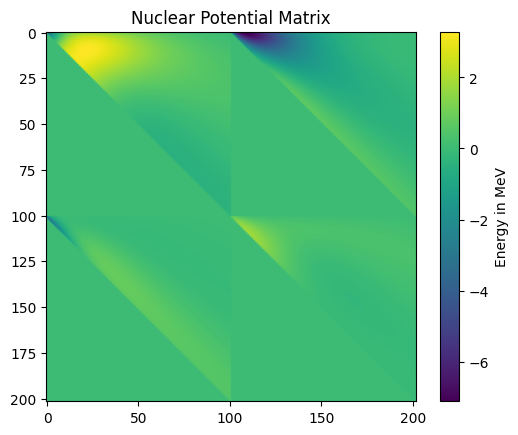

H_20 vs. H_02^T:
False


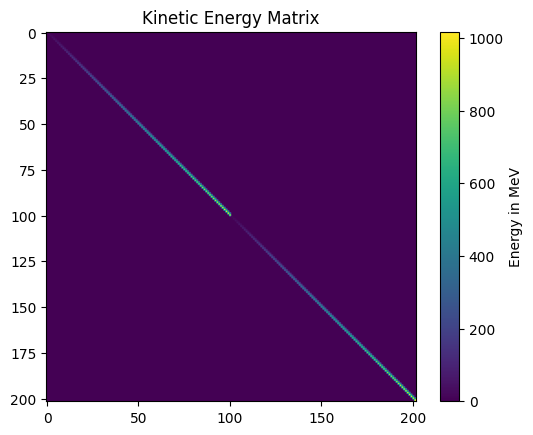

(3.617164281648801+0j)


In [ ]:
def create_hamiltonian_WIP_NON_herm(file1, file2, plotting = None):
    vNN = pd.read_csv(file1, sep = r"\s+", header = None, skiprows = 1)
    tRel = pd.read_csv(file2, sep = r"\s+", header = None, skiprows = 1)

    vNN = vNN.rename(columns = {0: "N", 1: "L", 2: "NN", 3:"LL", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})
    tRel = tRel.rename(columns = {0: "N", 1: "L", 2: "NN", 3:"LL", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})

    vNN = vNN.loc[(vNN['J'] == 1) & (vNN['S'] == 1) & (vNN['T'] == 0) & (vNN['MT'] == 0)]
    tRel = tRel.loc[(tRel['J'] == 1) & (tRel['S'] == 1) & (tRel['T'] == 0) & (tRel['MT'] == 0)]

    vNN = vNN.sort_values(['L',"LL"])
    tRel = tRel.sort_values(['L',"LL"])

    V_00 = vNN[(vNN['L'] == 0) & (vNN["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_02 = vNN[(vNN['L'] == 0) & (vNN["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_20 = vNN[(vNN['L'] == 2) & (vNN["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_22 = vNN[(vNN['L'] == 2) & (vNN["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values


    V = np.block([[V_00, V_02], [V_20, V_22]])

    T_00 = tRel[(tRel['L'] == 0) & (tRel["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_02 = tRel[(tRel['L'] == 0) & (tRel["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_20 = tRel[(tRel['L'] == 2) & (tRel["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_22 = tRel[(tRel['L'] == 2) & (tRel["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values

    T = np.block([[T_00, T_02], [T_20, T_22]])

    if plotting:
        plt.imshow(V)
        plt.colorbar(label = "Energy in MeV")
        plt.title("Nuclear Potential Matrix")
        plt.show()
        
        # Validate symmetry of submatrices
        print("V_20 vs. V_02^T:")
        print(np.allclose(V_20, V_02.T))

        plt.imshow(T)
        plt.colorbar(label = "Energy in MeV")
        plt.title("Kinetic Energy Matrix")
        plt.show()

    return V+T

def solve_eigensystem(m):
    w, v = np.linalg.eig(m)
    w = np.sort(w)
    return w, v

H = create_hamiltonian_WIP_NON_herm(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], plotting = True)
w, v = solve_eigensystem(H)
print(w[0])



    

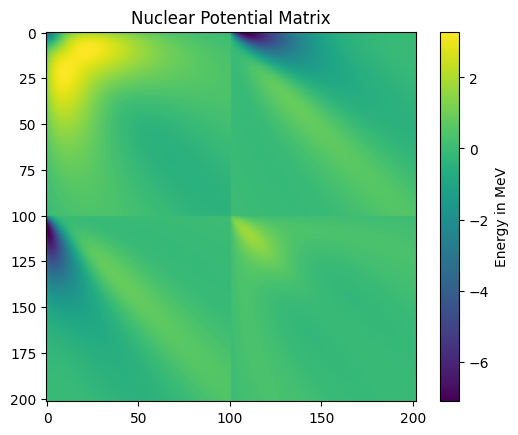

H_20 vs. H_02^T:
True


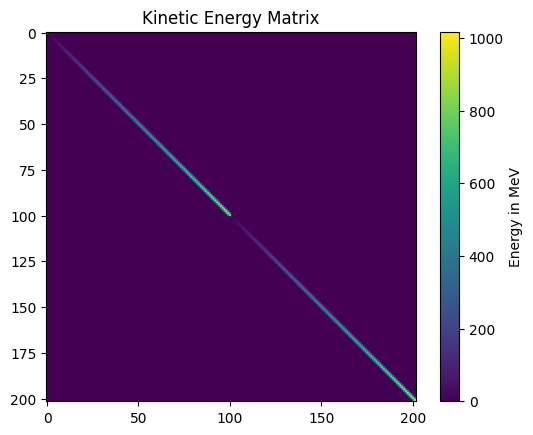

-2.2229970371096175


In [11]:
def symmetrize(m):
    return m + m.T - np.diag(m.diagonal())

def hermitize(m01, m10):
    return m01 + m10.T - np.diag(m01.diagonal())

def create_hamiltonian(file1, file2, Nmax = None, plotting = None):
    vNN = pd.read_csv(file1, sep = r"\s+", header = None, skiprows = 1)
    tRel = pd.read_csv(file2, sep = r"\s+", header = None, skiprows = 1)

    vNN = vNN.rename(columns = {0: "N", 1: "L", 2: "NN", 3:"LL", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})
    tRel = tRel.rename(columns = {0: "N", 1: "L", 2: "NN", 3:"LL", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})

    vNN = vNN.loc[(vNN['J'] == 1) & (vNN['S'] == 1) & (vNN['T'] == 0) & (vNN['MT'] == 0)]
    tRel = tRel.loc[(tRel['J'] == 1) & (tRel['S'] == 1) & (tRel['T'] == 0) & (tRel['MT'] == 0)]

    if Nmax is not None:
        vNN = vNN[(vNN['N'] <= Nmax) & (vNN['NN'] <= Nmax)]
        tRel = tRel[(tRel['N'] <= Nmax) & (tRel['NN'] <= Nmax)]

    vNN = vNN.sort_values(['L',"LL"])
    tRel = tRel.sort_values(['L',"LL"])

    V_00 = vNN[(vNN['L'] == 0) & (vNN["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_02_wip = vNN[(vNN['L'] == 0) & (vNN["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_20_wip = vNN[(vNN['L'] == 2) & (vNN["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_22 = vNN[(vNN['L'] == 2) & (vNN["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values

    V_00 = symmetrize(V_00)
    V_02 = hermitize(V_02_wip, V_20_wip)
    V_20 = hermitize(V_20_wip, V_02_wip)
    V_22 = symmetrize(V_22)

    V = np.block([[V_00, V_02], [V_20, V_22]])

    T_00 = tRel[(tRel['L'] == 0) & (tRel["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_02 = tRel[(tRel['L'] == 0) & (tRel["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_20 = tRel[(tRel['L'] == 2) & (tRel["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_22 = tRel[(tRel['L'] == 2) & (tRel["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values

    T_00 = symmetrize(T_00)
    T_22 = symmetrize(T_22)

    T = np.block([[T_00, T_02], [T_20, T_22]])

    if plotting:
        plt.imshow(V)
        plt.colorbar(label = "Energy in MeV")
        plt.title("Nuclear Potential Matrix")
        plt.show()
        
        # Validate symmetry of submatrices
        print("H_20 vs. H_02^T:")
        print(np.allclose(V_20, V_02.T))

        plt.imshow(T)
        plt.colorbar(label = "Energy in MeV")
        plt.title("Kinetic Energy Matrix")
        plt.show()

    return V+T

def solve_eigensystem_gsE(file1, file2, Nmax = None):
    if Nmax is not None:
        H = create_hamiltonian(file1, file2, Nmax)
    else:
        H = create_hamiltonian(file1, file2)
    w, v = np.linalg.eig(H)
    w_sorted = np.sort(w)
    return w_sorted[0]

H = create_hamiltonian(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], plotting = True)

gsE = solve_eigensystem_gsE(vNN_dat_chi2bSMSI5C[0], tRel_dat[0])
print(gsE)



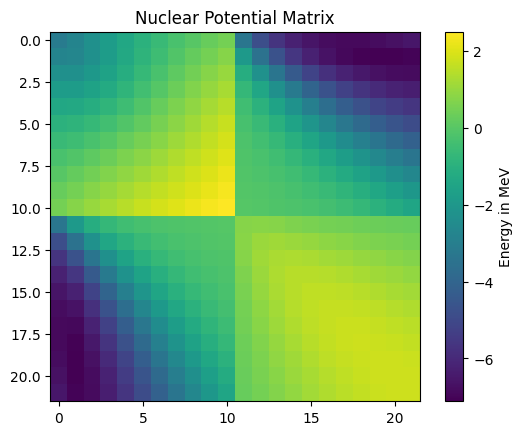

H_20 vs. H_02^T:
True


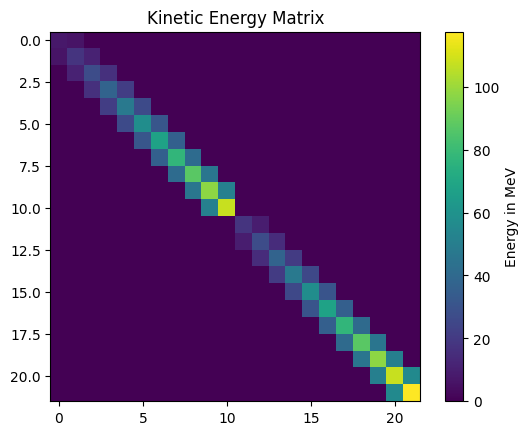

-0.5756846405992917


In [21]:
H = create_hamiltonian(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], 10 ,plotting = True)

gsE = solve_eigensystem_gsE(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], 10)
print(gsE)

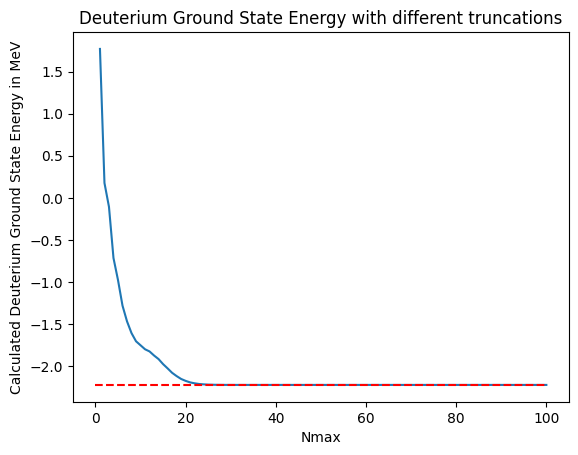

In [ ]:
# def all_gsE(file1_arr, file2_arr, plotting = None):
#     hw = [10, 12, 14, 16, 18, 20]
#     gsE = []
#     for i in range(6):
#         gsE.append(solve_eigensystem_gsE(file1_arr[i], file2_arr[i]))
#     if plotting:
#         plt.plot(hw, gsE)
#         plt.xlabel("hw")
#         plt.ylabel("gsE")
#         plt.show()
#     return gsE

def plot_gsE_vs_Nmax(file1, file2, Nmax_arr):
    gsE = []
    for Nmax in Nmax_arr:
        gsE.append(solve_eigensystem_gsE(file1, file2, Nmax))
    plt.plot(Nmax_arr, gsE)
    plt.title("Deuterium Ground State Energy with different truncations")
    plt.xlabel("Nmax")
    plt.ylabel("Calculated Energy in MeV")
    plt.hlines(-2.224575, 0, 100, colors = "r", linestyles = "dashed", label = "Experimental Value")
    plt.show()


Nmax_arr = np.arange(1,101, 1)
plot_gsE_vs_Nmax(vNN_dat_chi2bM3A[2], tRel_dat[2], Nmax_arr)

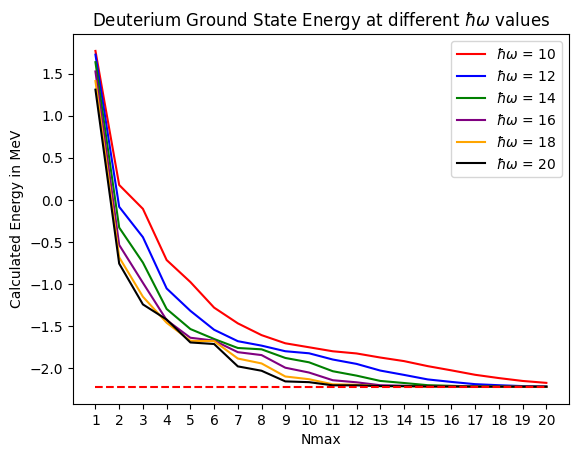

In [26]:

Nmax_arr = np.arange(1,21, 1)

gsE = [[],[],[],[],[],[]]
for i in range(6):
    for Nmax in Nmax_arr:
        gsE[i].append(solve_eigensystem_gsE(vNN_dat_chi2bM3A[i], tRel_dat[i], Nmax))

plt.plot(Nmax_arr, gsE[0], label = "$\hbar \omega$ = 10", color = "red")
plt.plot(Nmax_arr, gsE[1], label = "$\hbar \omega$ = 12", color = "blue")
plt.plot(Nmax_arr, gsE[2], label = "$\hbar \omega$ = 14", color = "green")
plt.plot(Nmax_arr, gsE[3], label = "$\hbar \omega$ = 16", color = "purple")
plt.plot(Nmax_arr, gsE[4], label = "$\hbar \omega$ = 18", color = "orange")
plt.plot(Nmax_arr, gsE[5], label = "$\hbar \omega$ = 20", color = "black")
plt.legend()
plt.xticks(np.arange(1,21,1))
plt.title("Deuterium Ground State Energy at different $\hbar \omega$ values")
plt.xlabel("Nmax")
plt.ylabel("Calculated Energy in MeV")
plt.hlines(-2.224644, 1, 20, color = "red", linestyles = "dashed")
plt.show()

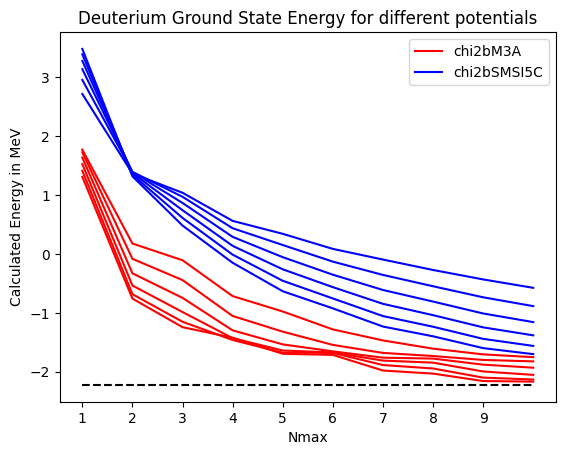

In [27]:
Nmax_arr = np.arange(1,11, 1) # takes 2 minutes to run with Nmax=21

gsE_M3A = [[],[],[],[],[],[]]
gSE_SMSI5C = [[],[],[],[],[],[]]
for i in range(6):
    for Nmax in Nmax_arr:
        gsE_M3A[i].append(solve_eigensystem_gsE(vNN_dat_chi2bM3A[i], tRel_dat[i], Nmax))
        gSE_SMSI5C[i].append(solve_eigensystem_gsE(vNN_dat_chi2bSMSI5C[i], tRel_dat[i], Nmax))

plt.plot(Nmax_arr, gsE_M3A[0], label = "chi2bM3A", color = "red")
plt.plot(Nmax_arr, gsE_M3A[1], color = "red")
plt.plot(Nmax_arr, gsE_M3A[2], color = "red")
plt.plot(Nmax_arr, gsE_M3A[3], color = "red")
plt.plot(Nmax_arr, gsE_M3A[4], color = "red")
plt.plot(Nmax_arr, gsE_M3A[5], color = "red")

plt.plot(Nmax_arr, gSE_SMSI5C[0], label = "chi2bSMSI5C", color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[1], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[2], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[3], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[4], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[5], color = "blue")

plt.legend()
plt.xticks(np.arange(1,10,1))
plt.xlabel("Nmax")
plt.ylabel("Calculated Energy in MeV")
plt.title("Deuterium Ground State Energy for different potentials")
plt.hlines(-2.224644, 1, 10, color = "black", linestyles = "dashed")
plt.show()

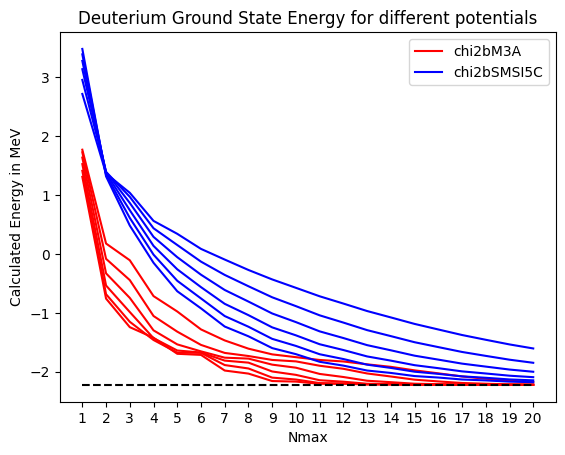

In [28]:
Nmax_arr = np.arange(1,21, 1)

gsE_M3A = [[],[],[],[],[],[]]
gSE_SMSI5C = [[],[],[],[],[],[]]

for i in range(6):
    def compute_gsE(i, Nmax):
        return (solve_eigensystem_gsE(vNN_dat_chi2bM3A[i], tRel_dat[i], Nmax),
                solve_eigensystem_gsE(vNN_dat_chi2bSMSI5C[i], tRel_dat[i], Nmax))

    results = Parallel(n_jobs=-1)(delayed(compute_gsE)(i, Nmax) for Nmax in Nmax_arr)

    for Nmax, (gsE_M3A_val, gSE_SMSI5C_val) in zip(Nmax_arr, results):
        gsE_M3A[i].append(gsE_M3A_val)
        gSE_SMSI5C[i].append(gSE_SMSI5C_val)

plt.plot(Nmax_arr, gsE_M3A[0], label = "chi2bM3A", color = "red")
plt.plot(Nmax_arr, gsE_M3A[1], color = "red")
plt.plot(Nmax_arr, gsE_M3A[2], color = "red")
plt.plot(Nmax_arr, gsE_M3A[3], color = "red")
plt.plot(Nmax_arr, gsE_M3A[4], color = "red")
plt.plot(Nmax_arr, gsE_M3A[5], color = "red")

plt.plot(Nmax_arr, gSE_SMSI5C[0], label = "chi2bSMSI5C", color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[1], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[2], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[3], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[4], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[5], color = "blue")

plt.legend()
plt.xticks(np.arange(1,21,1))
plt.xlabel("Nmax")
plt.ylabel("Calculated Energy in MeV")
plt.title("Deuterium Ground State Energy for different potentials")
plt.hlines(-2.224644, 1, 20, color = "black", linestyles = "dashed")
plt.show()

In [ ]:
# Calculating and potting the radial wavefunction

np
